## PS:
* Initialise simulation object using covasim model, with the parameters.
* Decide a threshold for closing workplaces for an effective policy to reducing covid effect.

## Solution

In [1]:
!pip install covasim

     |████████████████████████████████| 1.6 MB 5.0 MB/s 
     |████████████████████████████████| 159 kB 42.1 MB/s 
     |████████████████████████████████| 132 kB 40.7 MB/s 
     |████████████████████████████████| 67 kB 4.4 MB/s 
     |████████████████████████████████| 149 kB 18.8 MB/s 
     |████████████████████████████████| 181 kB 44.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73983 sha256=f8d7f5f04750a8abb7084972215373f460160cbae4bede3088d34c1686e0e6c0
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=c1f65ca7ae49fa81723eaa65989f067371d92e2d799fa56c82f21f211bc03609
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built jellyfish memory-profiler


In [2]:
import covasim as cv

Covasim 3.1.2 (2022-01-16) — © 2020-2022 by IDM


In [3]:
import pylab as pl
import sciris as sc
import covasim as cv

class store_seir(cv.Analyzer):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs) # This is necessary to initialize the class properly
        self.t = []
        self.S = []
        self.E = []
        self.I = []
        self.R = []
        return

    def apply(self, sim):
        ppl = sim.people # Shorthand
        self.t.append(sim.t)
        self.S.append(ppl.susceptible.sum())
        self.E.append(ppl.exposed.sum() - ppl.infectious.sum())
        self.I.append(ppl.infectious.sum())
        self.R.append(ppl.recovered.sum() + ppl.dead.sum())
        return

    def plot(self):
        pl.figure()
        pl.plot(self.t, self.S, label='S')
        pl.plot(self.t, self.E, label='E')
        pl.plot(self.t, self.I, label='I')
        pl.plot(self.t, self.R, label='R')
        pl.legend()
        pl.xlabel('Day')
        pl.ylabel('People')
        sc.setylim() # Reset y-axis to start at 0
        sc.commaticks() # Use commas in the y-axis labels
        return


In [4]:
pars = {'location': 'india',
 'n_beds_hosp': 0.5 * (1000000 / 1000),
 'n_beds_icu': 0.068 * (1000000 / 1000),
 'n_days': 300,
 'n_variants': 3,
 'no_hosp_factor': 2,
 'no_icu_factor': 3,
 'pop_size': 100000,
 'pop_type': 'hybrid',
 'rand_seed': 9,
 'start_day': '2021-04-01'}

### population with default parameters and no shutdown of workplace.

Initializing sim with 100000 people for 300 days
Loading location-specific data for "india"


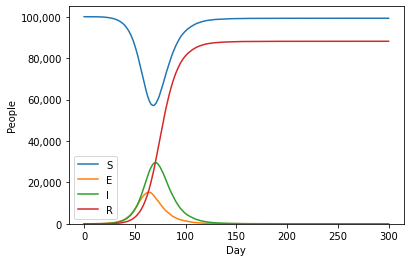

In [5]:
sim = cv.Sim(pars, label='whole population on ground',  analyzers=store_seir(label='seir'))
sim.run(verbose=0)
seir = sim.get_analyzer('seir') # Retrieve by label
seir.plot()

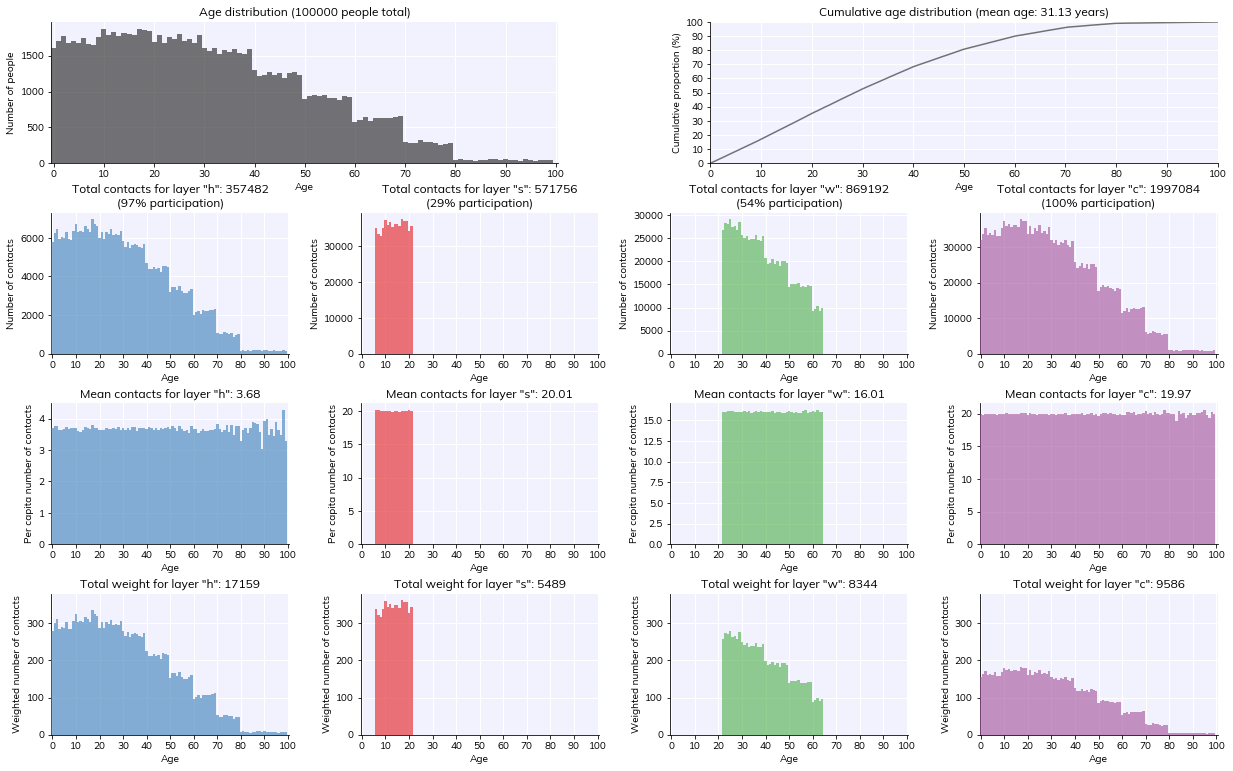

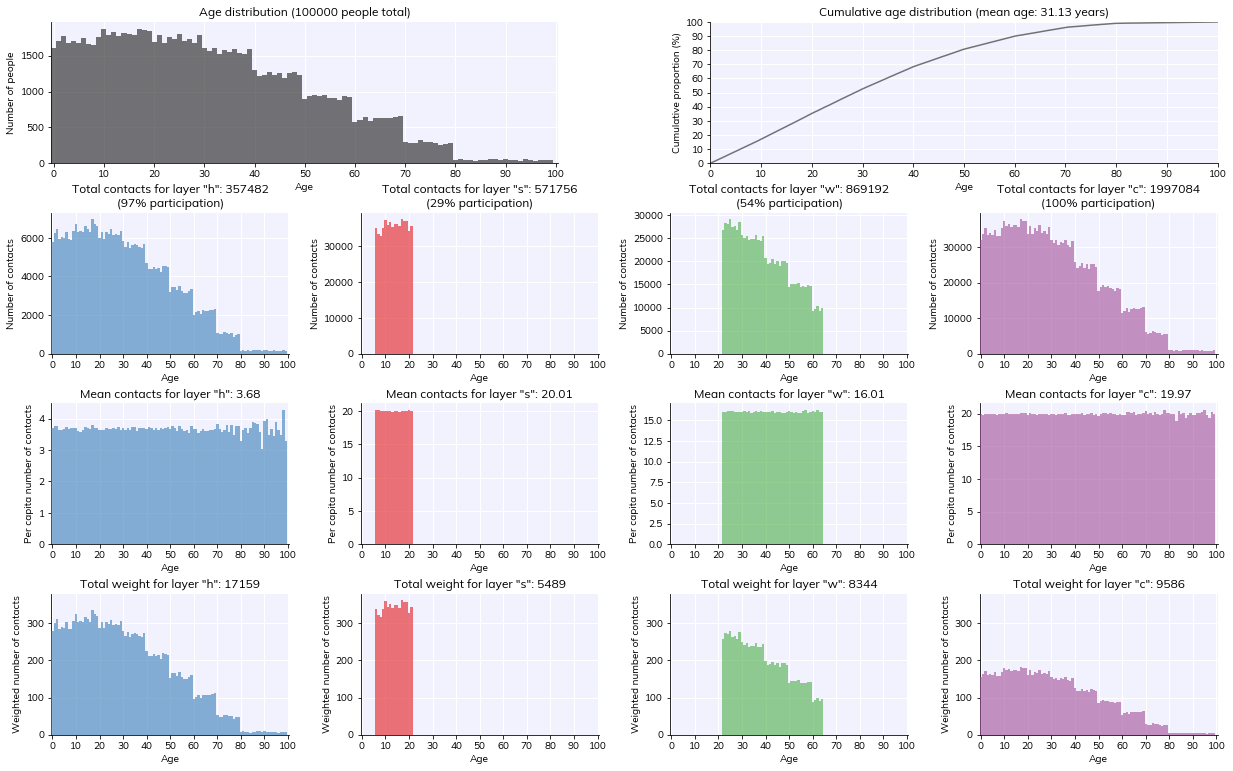

In [6]:
sim.people.plot() # plots 2 times

* The age group for people in workplace is ~ (22-65).
* The average number of contacts for each person in workplace is ~16.


### population with default parameters and 70 shutdown for people workplace.

Initializing sim with 100000 people for 300 days
Loading location-specific data for "india"


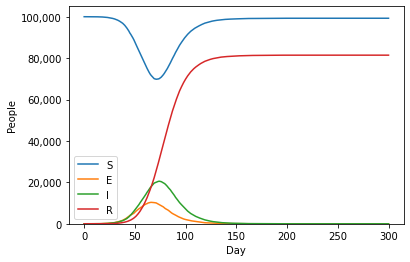

In [20]:
import numpy as np
import pylab as pl
import covasim as cv


# Define the intervention and the scenario sim
# protect = protect_elderly(start_day='2021-05-17', end_day='2021-07-05', rel_sus=0.1) # Create intervention
interv = cv.clip_edges([i for i in range(46,92)], [0.3]*46,layers='w') # On day 25, reduce overall contacts by 70% to 0.3
# pars2  = pars.copy()
# pars2['start_day'] = '2021-05-17'
# pars2['end_day'] = '2021-07-05'
sim2 = cv.Sim(pars, interventions=interv, label='closing workplace by 70%',  analyzers=store_seir(label='seir'))
sim2.run(verbose=0)
seir = sim2.get_analyzer('seir') # Retrieve by label
seir.plot()

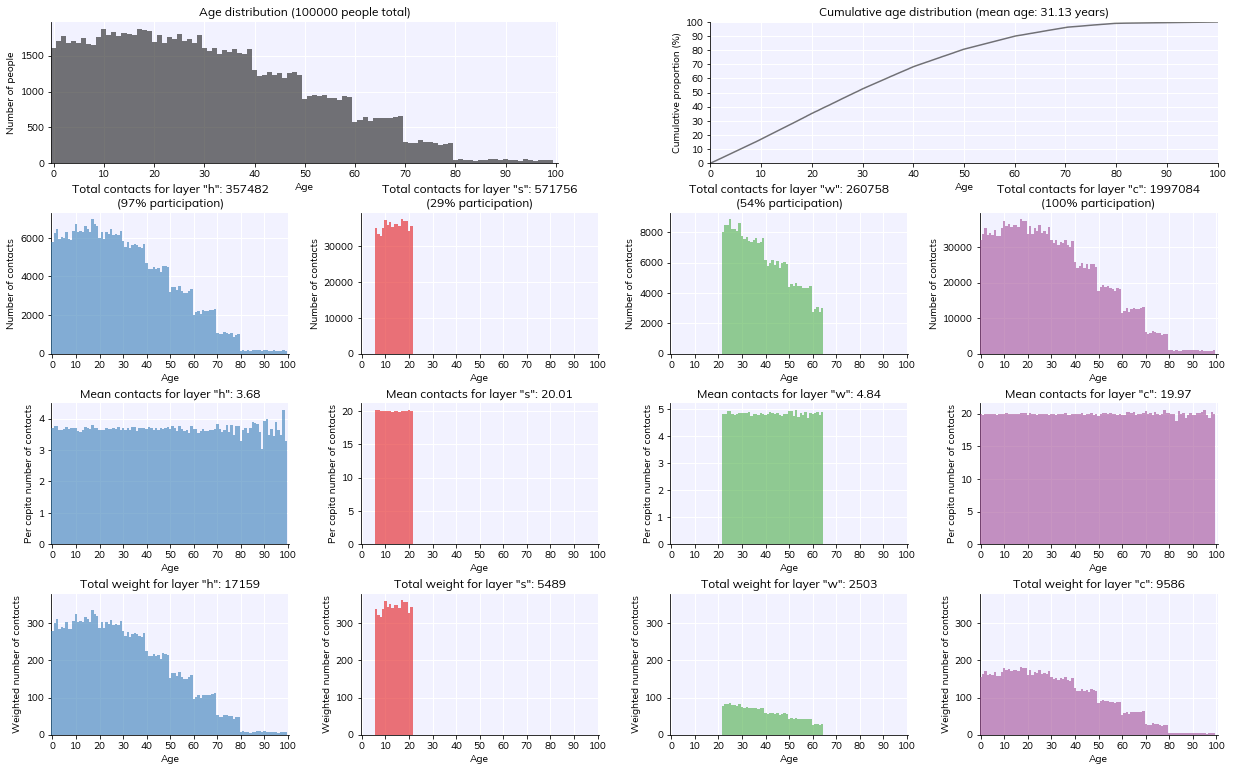

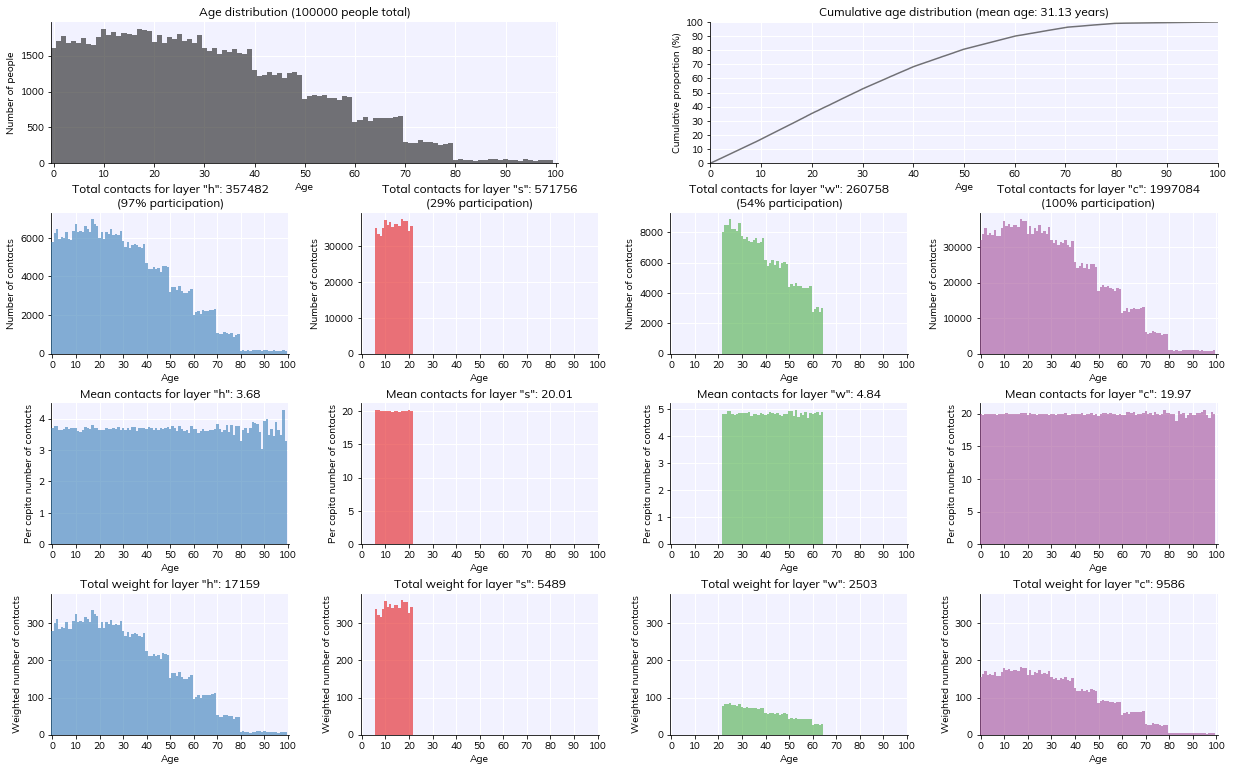

In [21]:
sim2.people.plot()

* on removing 70% of the people (for each day) the mean contacts for people in workplace reduced to ~5.

### population with default parameters and removing 50% of the population from workplace.

Initializing sim with 100000 people for 300 days
Loading location-specific data for "india"


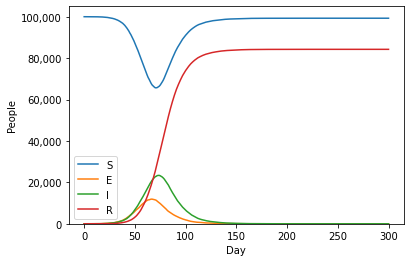

In [22]:
import numpy as np
import pylab as pl
import covasim as cv


# Define the intervention and the scenario sim
interv = cv.clip_edges([i for i in range(46,92)], [0.5]*46,layers='w') 
# pars2  = pars.copy()
# pars2['start_day'] = '2021-05-17'
# pars2['end_day'] = '2021-07-05'
sim3 = cv.Sim(pars, interventions=interv, label='closing workplace by 50%',  analyzers=store_seir(label='seir'))
sim3.run(verbose=0)
seir = sim3.get_analyzer('seir') # Retrieve by label
seir.plot()

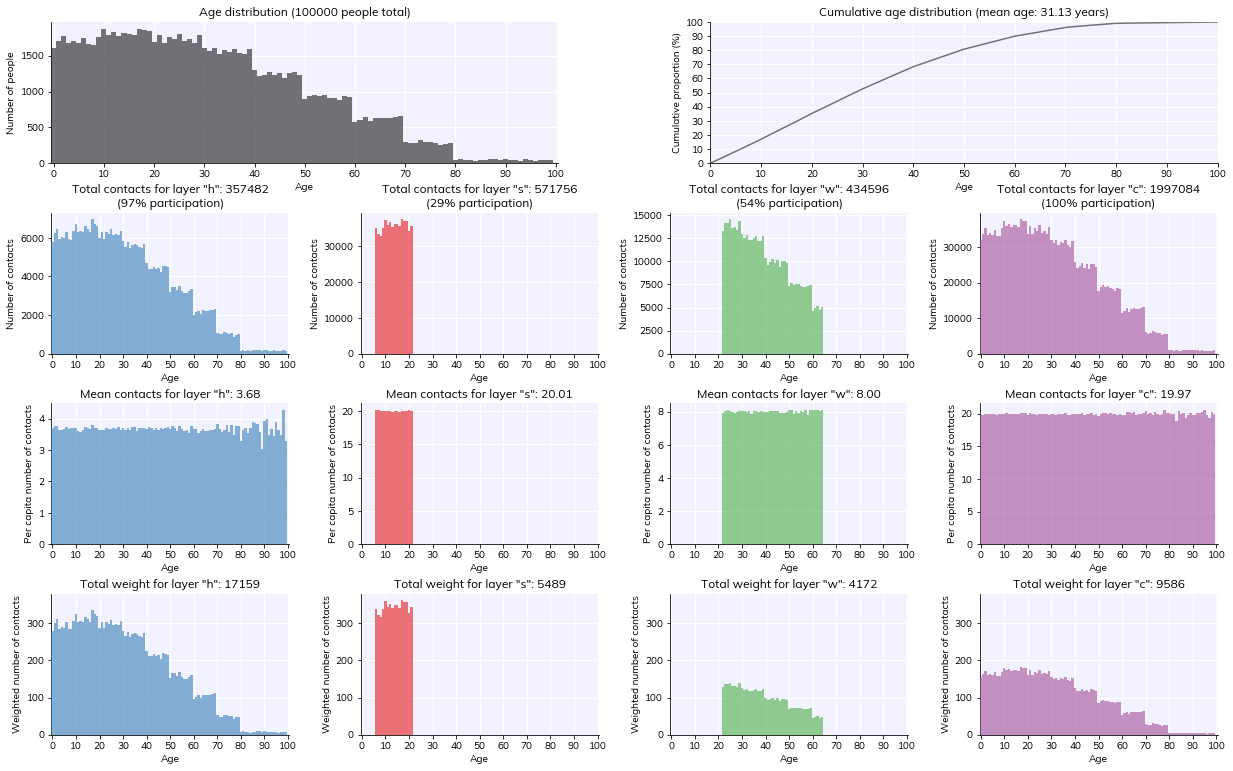

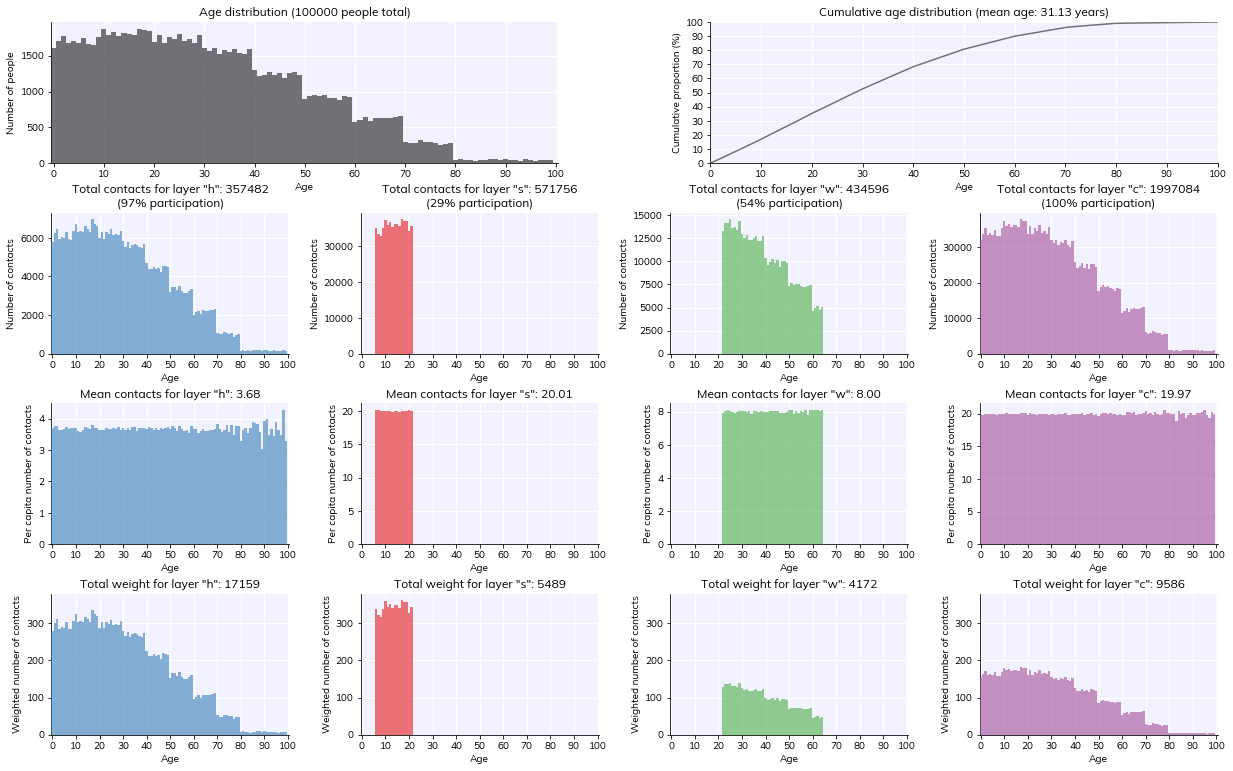

In [23]:
sim3.people.plot()

* on removing 50% of the people (for each day) the mean contacts for people in workplace reduced is ~8.

### population with default parameters and removing 30% of the population from workplace.

Initializing sim with 100000 people for 300 days
Loading location-specific data for "india"


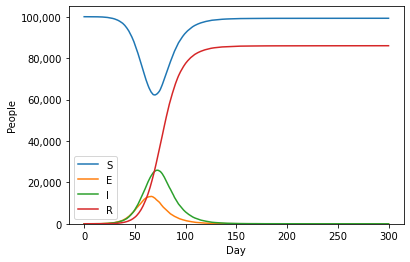

In [24]:
import numpy as np
import pylab as pl
import covasim as cv


# Define the intervention and the scenario sim
interv = cv.clip_edges([i for i in range(46,92)], [0.7]*46,layers='w') 
# pars2  = pars.copy()
# pars2['start_day'] = '2021-05-17'
# pars2['end_day'] = '2021-07-05'
sim4 = cv.Sim(pars, interventions=interv, label='closing workplace by 30%',  analyzers=store_seir(label='seir'))
sim4.run(verbose=0)
seir = sim4.get_analyzer('seir') # Retrieve by label
seir.plot()

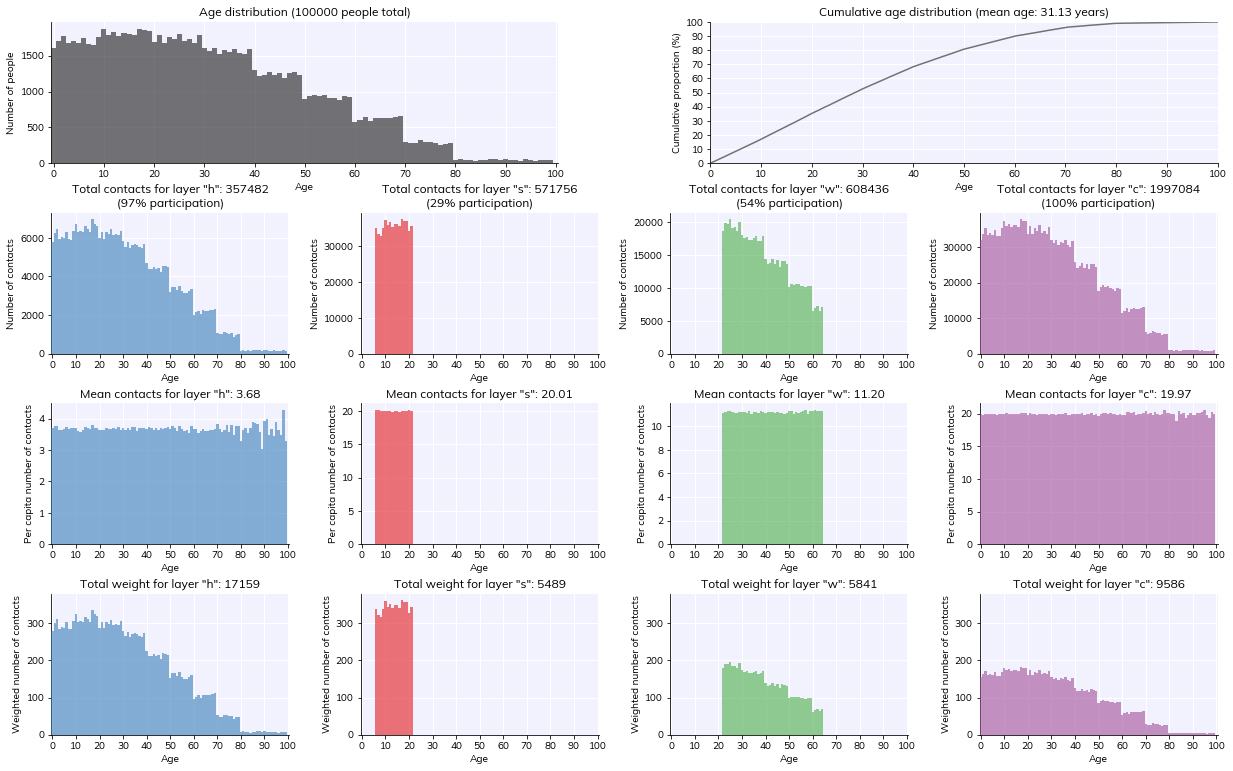

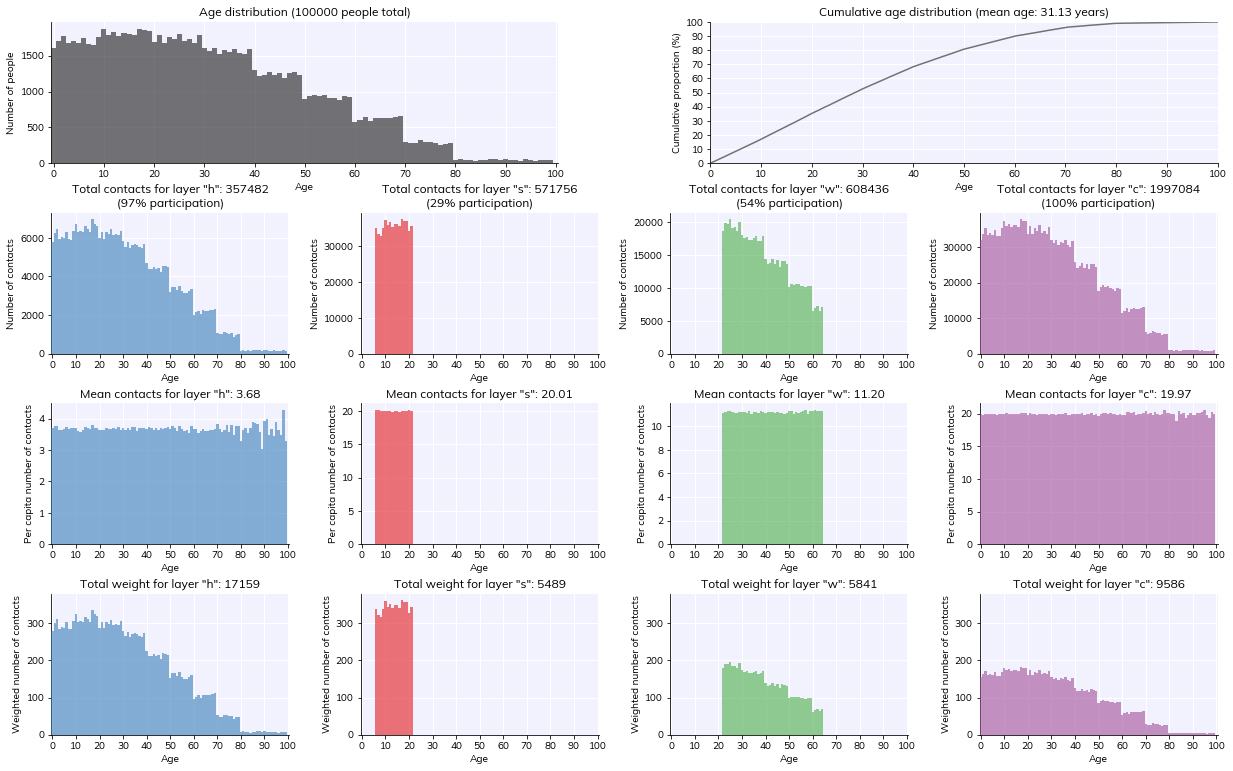

In [25]:
sim4.people.plot()

* on removing 30% of the people (for each day) the mean contacts for people in workplace reduced to ~11.

### population with default parameters and removing 40% of the population from workplace.

Initializing sim with 100000 people for 300 days
Loading location-specific data for "india"


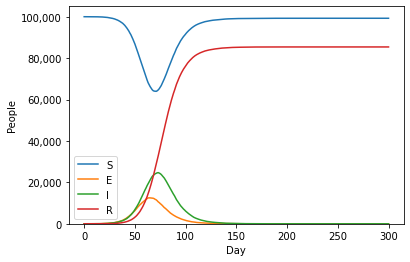

In [27]:
import numpy as np
import pylab as pl
import covasim as cv

interv = cv.clip_edges([i for i in range(46,92)], [0.6]*46,layers='w')  

sim5 = cv.Sim(pars, interventions=interv, label='closing workplace by 60%',  analyzers=store_seir(label='seir'))
sim5.run(verbose=0)
seir = sim5.get_analyzer('seir') # Retrieve by label
seir.plot()

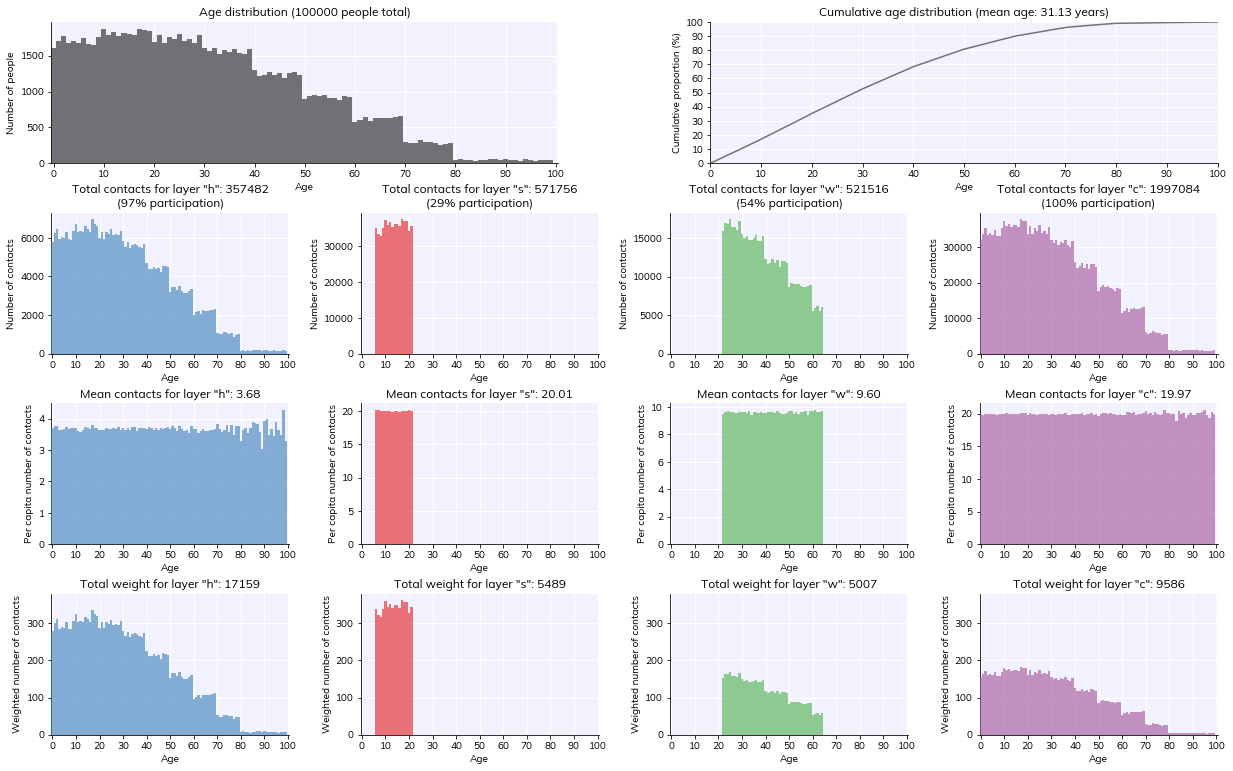

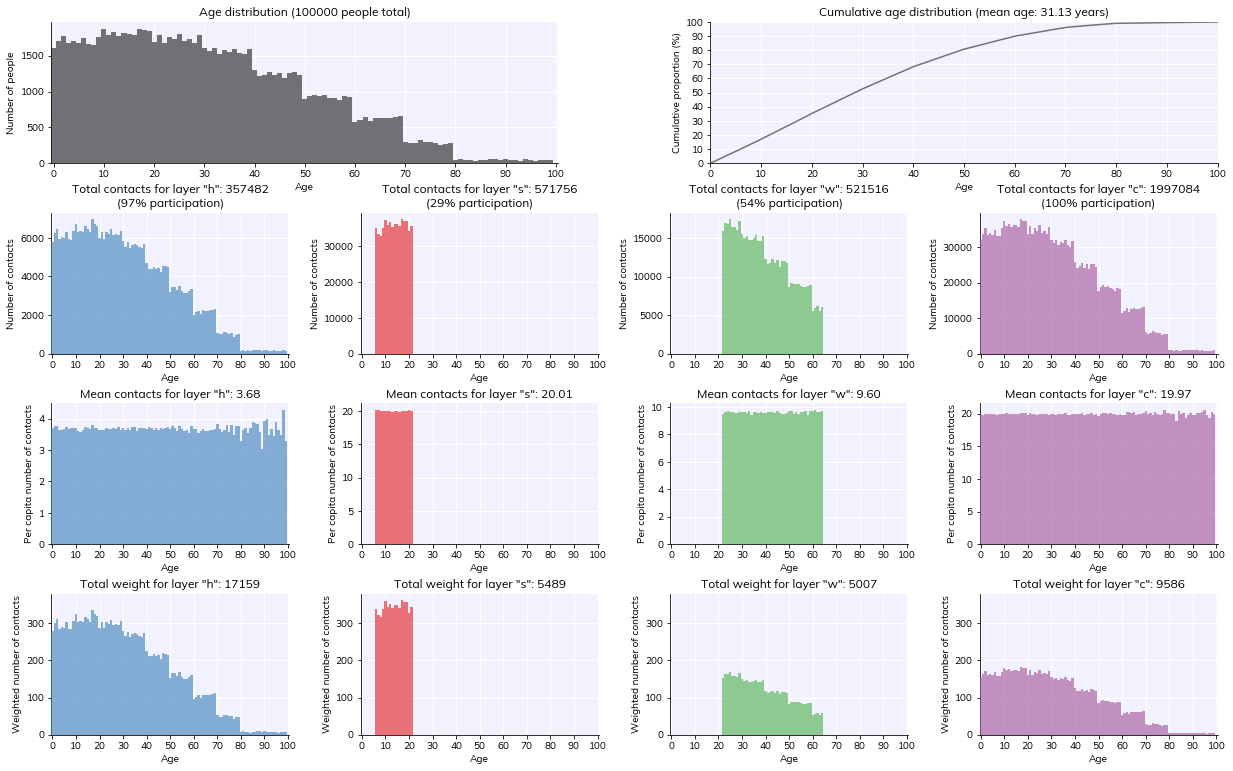

In [28]:
sim5.people.plot()

* on removing 40% of the people (for each day) the mean contacts for people in workplace is ~10.

## Selecting the policy
* considering the SEIR's of the different simulation's as below.
![picture](https://drive.google.com/uc?export=view&id=17TWxmk-g5YIQe8haO55BdBQkksRS-EWL)

Suspectability
* The more the contacts are removed, the lesser suspectibilty (those able to contract the disease) gets.
* But the quick decrease can be seen in 30% and 40% removal.


Exposibilty
* The more contacts are removed, the lesser exposibility(those who have been infected but are not yet infectious) gets.
* The lowest exposibilty is seen in 30% and 40% removal.

Infection
* The more contacts are remoeved, the lesser infection (those capable of transmitting the disease) ratio gets.
* within 30-40 % removal the gradual decrease of infectious people after spike can be seen.

Recovery
* The more contacts are removed, the faster is the recovery rate.
* The fastest recovery is also when almost 30-40% of the people from workplace are removed.



Considering the total death counts.

* With each death count taking flight after jun, but we can see that removing 50% of the population had the lowest cum death count and the lowest percentage of contacts removed.

![picture](https://drive.google.com/uc?export=view&id=18Mb3YTebOdNIxLMfKvwsncYp7NP42CKF)

**Therefore, since we want to optimize the amount of contacts to be removed from the workplace and also keep the spread of infection and deaths low, we can go ahead with removal of 50% of contacts.**

## Final simulation object

In [36]:
sim3

Sim("closing workplace by 50%"; 2021-04-01 to 2022-01-26; pop: 100000 hybrid; epi: 102251⚙, 746☠)